### 41. Закон Архимеда
Шар радиуса 𝑅 и плотности 𝜌 плавает в жидкости плотности 𝜌0. Требуется определить, на какую глубину погрузится в жидкость этот шар. Задача сводится к решению кубического уравнения.

1. Выведите это кубическое уравнение

2. Решите его численно (см. scipy.optimize.brentq или другой метод) для значений:

2а. 𝑅=1, 𝜌=500, 𝜌0=1000

2b. 𝑅=1, 𝜌=755, 𝜌0=997

Уравнение имеет три решения. Какие из них надо отбросить?

Построить график зависимости глубины погружения шара единичного радиуса от значения 𝜌/𝜌0.

### Импортируем библиотеки numpy, scipy.optimize.brentq, mathplotlib.pyplot

In [24]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

### В этом коде функция cubic_eq определяет кубическое уравнение, которое используется для нахождения глубины погружения мяча.

### Функция depth_of_immersion использует метод brentq из модуля scipy.optimize для нахождения корня кубического уравнения, соответствующего глубине погружения. Функция depth_of_immersion принимает в качестве аргументов радиус шара R, его плотность rho и плотность жидкости rho_0.

In [25]:
def cubic_eq(x, R, rho, rho_0):
    a = np.pi * R ** 3 * (rho - rho_0) / 3
    b = np.pi * R ** 2 * rho_0 * x
    c = -np.pi * R ** 3 * rho / 3
    return a * x ** 3 + b * x ** 2 + c

def depth_of_immersion(R, rho, rho_0):
    # найти глубину погружения по методу Брента
    f = lambda x: cubic_eq(x, R, rho, rho_0)
    x0 = 0.1
    x1 = 10
    try:
        x_immersed = brentq(f, x0, x1)
        return x_immersed
    except ValueError:
        return np.nan

### Затем код решает задачу 2, вызывая функцию depth_of_immersion для заданных значений R, rho и rho_0. Результаты выводятся на консоль.

In [29]:
R1 = 1
rho1 = 500
rho_01 = 1000
x1 = depth_of_immersion(R1, rho1, rho_01)
print("Глубина погружения для R=1, rho=500, rho_0=1000:", x1)

R2 = 1
rho2 = 755
rho_02 = 997
x2 = depth_of_immersion(R2, rho2, rho_02)
print("Глубина погружения для R=1, rho=755, rho_0=997:", x2)

Глубина погружения для R=1, rho=500, rho_0=1000: 0.5848035476425733

Глубина погружения для R=1, rho=755, rho_0=997: 0.6500160355593745


### Наконец, код строит график зависимости глубины погружения шара единичного радиуса от отношения rho/rho_0. Он делает это, вычисляя глубину погружения для диапазона значений rho/rho_0 с помощью цикла, а затем используя matplotlib для построения графика результатов.

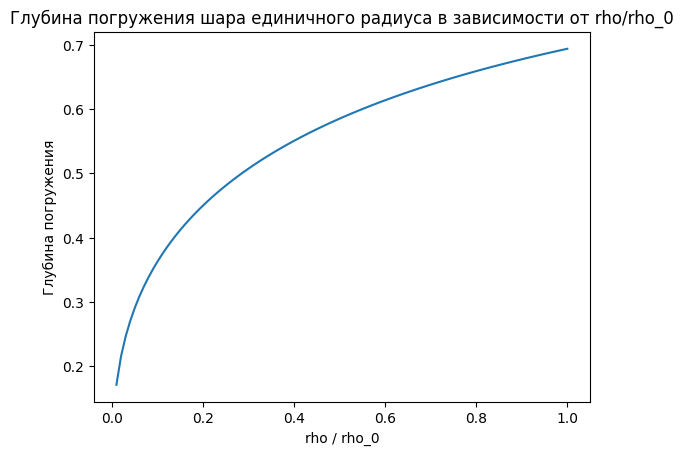

In [27]:
# Строим график зависимости глубины погружения от rho/rho_0
rho_ratios = np.linspace(0, 1, 100)
depths = []
for ratio in rho_ratios:
    rho = rho_01 * ratio
    x = depth_of_immersion(R1, rho, rho_01)
    depths.append(x)
    
plt.plot(rho_ratios, depths)
plt.xlabel("rho / rho_0")
plt.ylabel("Глубина погружения")
plt.title("Глубина погружения шара единичного радиуса в зависимости от rho/rho_0")
plt.show()